<a href="https://colab.research.google.com/github/Rodizo/CS231N-Standford/blob/main/Linear_reg_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
# color_pal = sns.color_palette()
# plt.style.use('fivethirtyeight')

data = pd.read_excel('Untitled spreadsheet.xlsx')

In [20]:
data = data.set_index('date')
data.index = pd.to_datetime(data.index)

In [21]:
pip install bayesian-optimization

In [22]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from bayes_opt import BayesianOptimization

# Function to create dataset with look-back
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)


In [24]:
data.head(10)
series = data['meantemp']
series.head()

date
2013-01-02    7.400000
2013-01-03    7.166667
2013-01-04    8.666667
2013-01-05    6.000000
2013-01-06    7.000000
Name: meantemp, dtype: float64

In [25]:
tscv = TimeSeriesSplit(n_splits=8)
splits = tscv.split(series)

# Placeholder for model results
results = []

# Function to build LSTM model
def lstm_model(look_back, lstm_units, lr):
    model = Sequential([
        LSTM(int(lstm_units), input_shape=(look_back, 1)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
    return model

In [26]:

tscv = TimeSeriesSplit(n_splits=8)
splits = list(tscv.split(series))
splits

[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
         104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
         117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
         130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
         143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
         156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
         169, 170, 171, 172, 173, 174,

In [27]:
look_back = 5

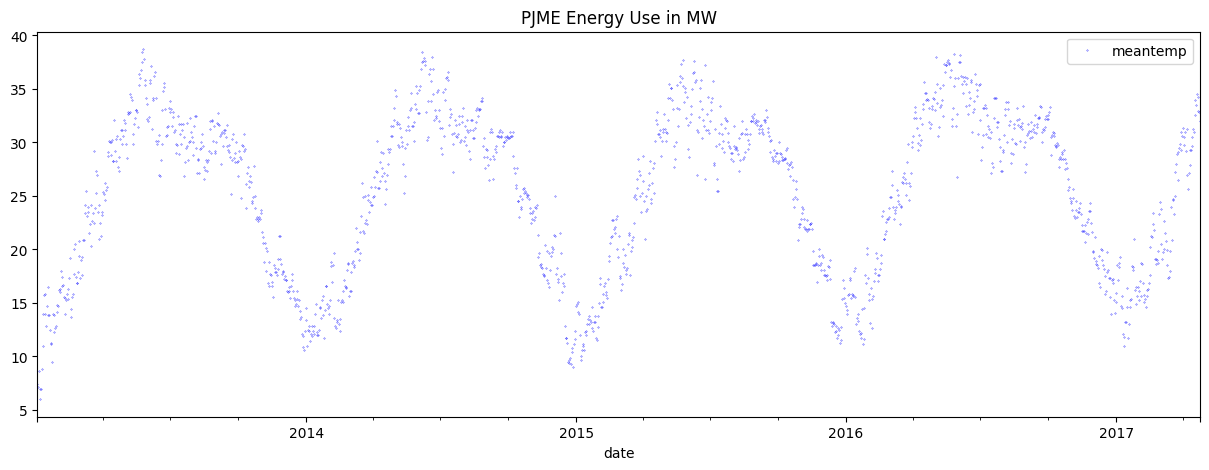

In [28]:
data.plot(style='.',
        figsize=(15, 5),
        color='blue',
        title='PJME Energy Use in MW',
        markersize = 0.5)
plt.show()

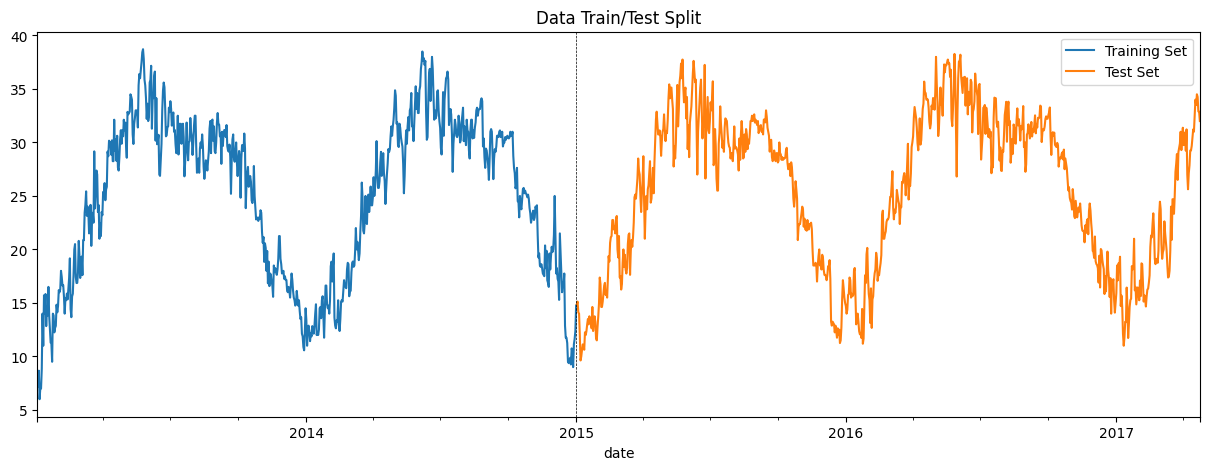

In [33]:
train = data.loc[data.index < '01-01-2015 01:00:00']
test = data.loc[data.index >= '01-01-2015 01:00:00']

fig, ax = plt.subplots(figsize=(15, 5))
# Plot only the PJME_MW column for both training and test sets
train['meantemp'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['meantemp'].plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--', linewidth=0.5)
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
test.size()

In [44]:

from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=3, test_size=250, gap=0)
data = data.sort_index()

In [45]:
for train_idx, val_idx in tss.split(data):
    print("Training indices:", train_idx)
    print("Validation indices:", val_idx)


Training indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 

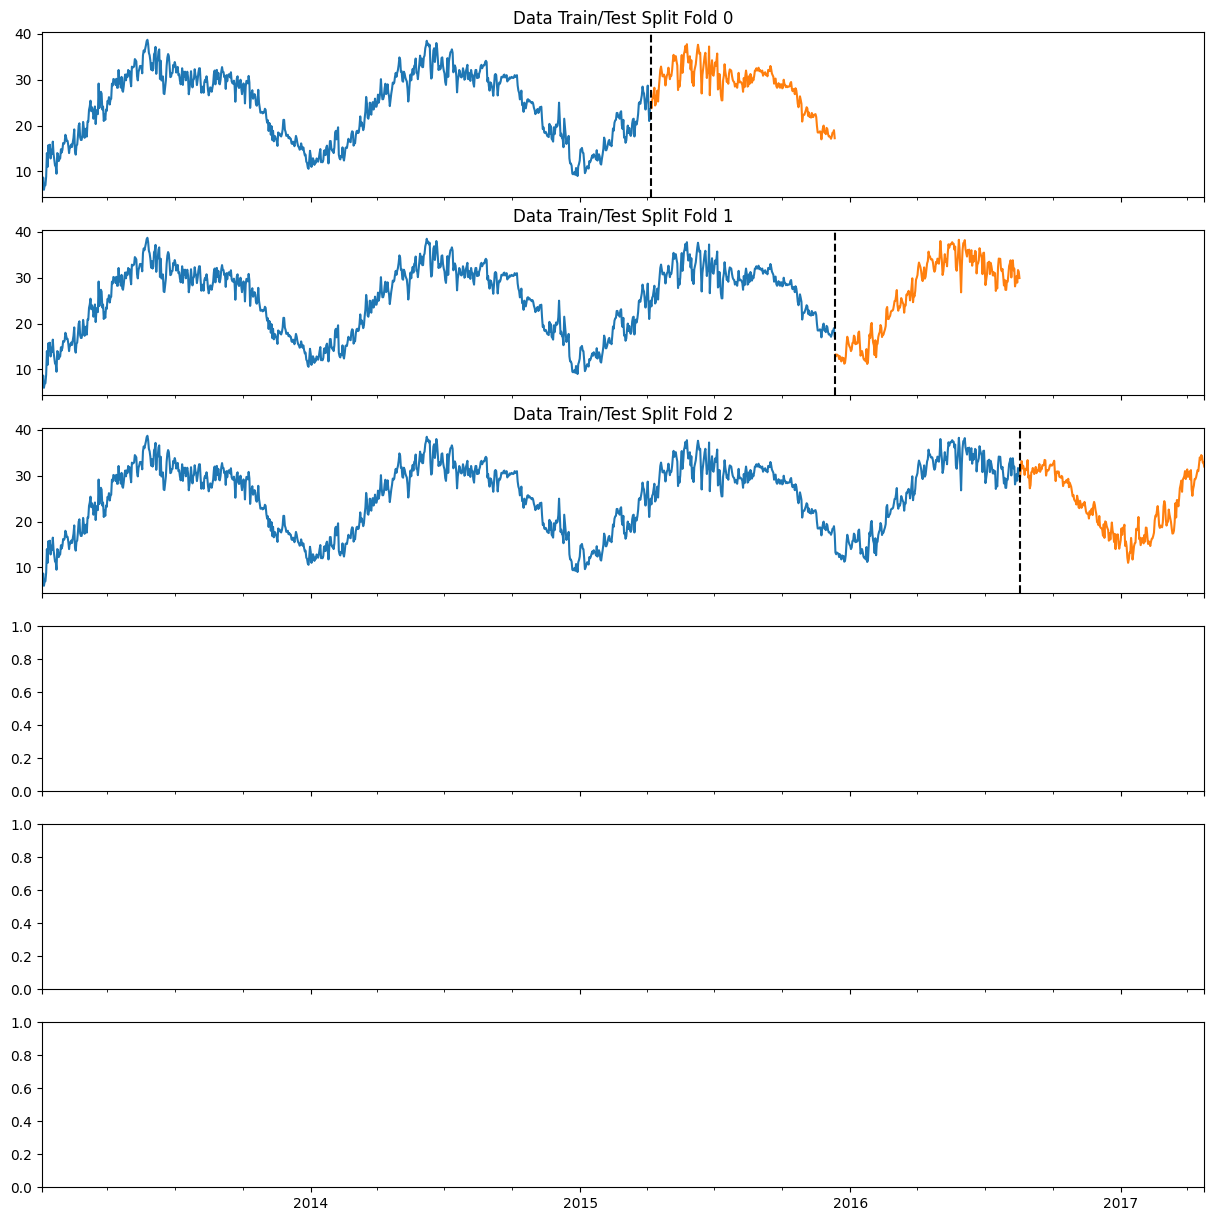

In [47]:
fig, axs = plt.subplots(6, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(data):
    train = data.iloc[train_idx]
    test = data.iloc[val_idx]
    train['meantemp'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['meantemp'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [48]:
!pip install keras-tuner



In [49]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.15.0
Num GPUs Available:  0


In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

# Load your data
data = pd.read_excel('Untitled spreadsheet.xlsx')
data = data.set_index('date')
data.index = pd.to_datetime(data.index)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
data['normalized'] = scaler.fit_transform(data['meantemp'].values.reshape(-1,1))

# Function to create dataset with lags
def create_dataset_with_lags(series, n_lags):
    df = pd.DataFrame(series)
    columns = [df.shift(i) for i in range(n_lags + 1)]
    df = pd.concat(columns, axis=1)
    df.dropna(inplace=True)  # Drop rows with NaN values (these are the rows for which we don't have enough data to create lags)
    return df

# Objective function for Bayesian Optimization
def regression_with_lags(n_lags):
    n_lags = int(n_lags)
    tss = TimeSeriesSplit(n_splits=3)  # Less splits for quicker optimization

    mse_scores = []

    for train_index, val_index in tss.split(data):
        train, val = data.iloc[train_index], data.iloc[val_index]

        # Create datasets
        train_lags = create_dataset_with_lags(train['normalized'], n_lags)
        val_lags = create_dataset_with_lags(val['normalized'], n_lags)

        # Split into features and target
        X_train, y_train = train_lags.iloc[:, 1:], train_lags.iloc[:, 0]
        X_val, y_val = val_lags.iloc[:, 1:], val_lags.iloc[:, 0]

        # Train model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Validate model
        predictions = model.predict(X_val)
        mse = mean_squared_error(y_val, predictions)
        mse_scores.append(mse)

    return -np.mean(mse_scores)  # Negative MSE because Bayesian Optimization maximizes the function

# Setup Bayesian Optimization
optimizer = BayesianOptimization(
    f=regression_with_lags,
    pbounds={'n_lags': (1, 24)},  # Number of lags from 1 to 24 hours
    random_state=1,
    verbose=2
)
optimizer.maximize(init_points=2, n_iter=1)

# Best number of lags found
best_n_lags = int(optimizer.max['params']['n_lags'])
print('Best number of lags:', best_n_lags)

# Train final model with the best number of lags
final_model_dataset = create_dataset_with_lags(data['normalized'], best_n_lags)
X, y = final_model_dataset.iloc[:, 1:], final_model_dataset.iloc[:, 0]
model = LinearRegression()
model.fit(X, y)
print('Model trained with optimal number of lags.')


|   iter    |  target   |  n_lags   |
-------------------------------------
| 1         | -0.002372 | 10.59     |
| 2         | -0.002397 | 17.57     |
| 3         | -0.002372 | 10.4      |
Best number of lags: 10
Model trained with optimal number of lags.


Symmetric Mean Absolute Percentage Error (sMAPE): 5.22%
Mean Absolute Error (MAE): 1.22
Coefficient for lag 1: 0.7903858419656175
Coefficient for lag 2: 0.04556392472847785
Coefficient for lag 3: -0.03217161169353682
Coefficient for lag 4: 0.07304149698685755
Coefficient for lag 5: 0.01980738947413064
Coefficient for lag 6: 0.04312735512881137
Coefficient for lag 7: -0.020471090992044944
Coefficient for lag 8: 0.04039252979038919
Coefficient for lag 9: -0.0363802776960004
Coefficient for lag 10: 0.06247162165974399


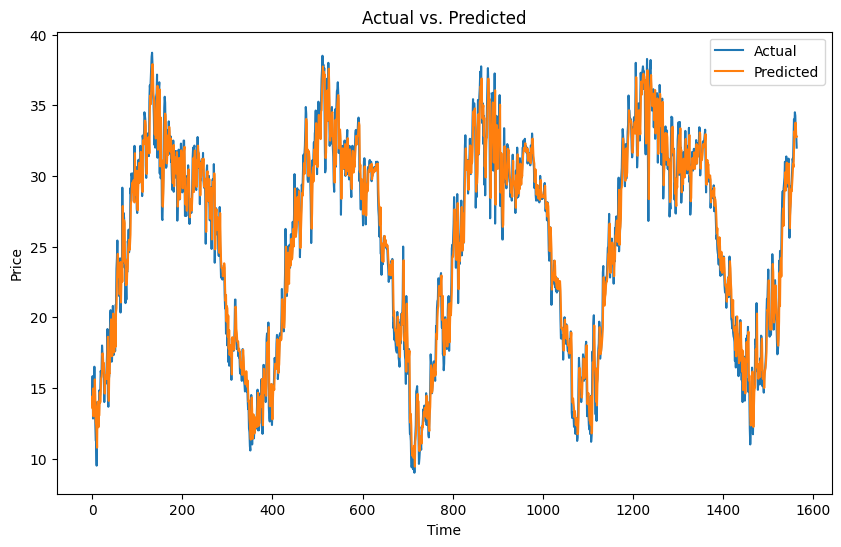

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Make predictions with the final model
predictions = model.predict(X)

# Inverse transform the predictions and actual values to get them back to original scale
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
actual = scaler.inverse_transform(y.values.reshape(-1, 1)).flatten()

# Calculate symmetric MAPE
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 200 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

smape = symmetric_mean_absolute_percentage_error(actual, predictions)
print('Symmetric Mean Absolute Percentage Error (sMAPE): {:.2f}%'.format(smape))

# Calculate MAE for reference
mae = mean_absolute_error(actual, predictions)
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))

# Print coefficients for each lag
coefficients = model.coef_
for lag, coef in enumerate(coefficients, start=1):
    print(f'Coefficient for lag {lag}: {coef}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Symmetric Mean Absolute Percentage Error (sMAPE): 5.22%
Mean Absolute Error (MAE): 1.22
Coefficient for lag 1: 0.7903858419656175
Coefficient for lag 2: 0.04556392472847785
Coefficient for lag 3: -0.03217161169353682
Coefficient for lag 4: 0.07304149698685755
Coefficient for lag 5: 0.01980738947413064
Coefficient for lag 6: 0.04312735512881137
Coefficient for lag 7: -0.020471090992044944
Coefficient for lag 8: 0.04039252979038919
Coefficient for lag 9: -0.0363802776960004
Coefficient for lag 10: 0.06247162165974399


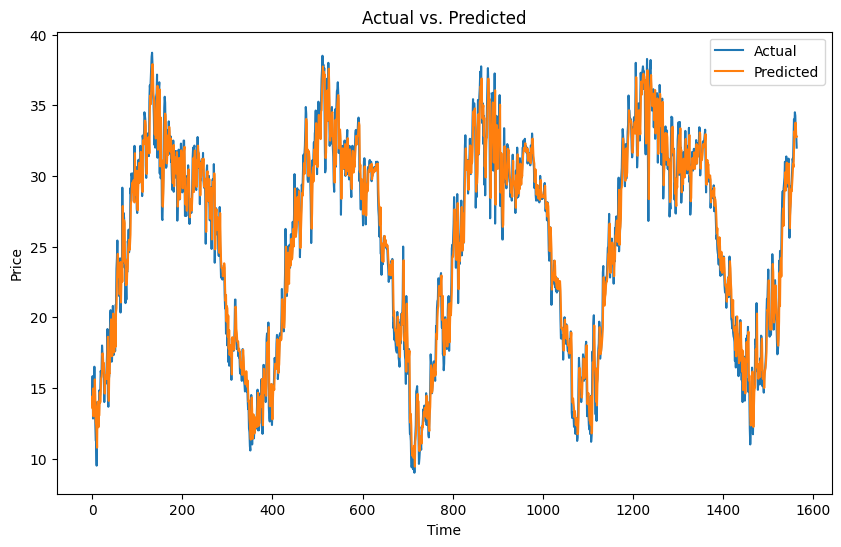

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Make predictions with the final model
predictions = model.predict(X)

# Inverse transform the predictions and actual values to get them back to original scale
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
actual = scaler.inverse_transform(y.values.reshape(-1, 1)).flatten()

# Calculate symmetric MAPE
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 200 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

smape = symmetric_mean_absolute_percentage_error(actual, predictions)
print('Symmetric Mean Absolute Percentage Error (sMAPE): {:.2f}%'.format(smape))

# Calculate MAE for reference
mae = mean_absolute_error(actual, predictions)
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))

# Print coefficients for each lag
coefficients = model.coef_
for lag, coef in enumerate(coefficients, start=1):
    print(f'Coefficient for lag {lag}: {coef}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Number of lags for prediction
n_lags = best_n_lags  # Assuming you've already determined the best number of lags

# Function to create lagged features for prediction
def create_lagged_features_for_prediction(data, predictions, n_lags):
    lagged_features = []
    for i in range(n_lags):
        if i < len(predictions):
            lagged_features.append(predictions[-(i+1)])
        else:
            lagged_features.append(data[-(i+1)])
    return np.array(lagged_features).reshape(1, -1)

# Make predictions for the entire testing set iteratively
test_predictions = []
for i in range(len(X)):
    # Use the last n_lags predicted values as features for prediction
    lagged_features = create_lagged_features_for_prediction(data['normalized'], test_predictions, n_lags)

    # Predict the next value
    next_prediction = model.predict(lagged_features)

    # Inverse transform the prediction to get it back to the original scale
    next_prediction = scaler.inverse_transform(next_prediction.reshape(-1, 1)).flatten()[0]

    # Append the prediction to the list of predictions
    test_predictions.append(next_prediction)

# Inverse transform the actual values to get them back to the original scale
actual = scaler.inverse_transform(y.values.reshape(-1, 1)).flatten()

# Calculate symmetric MAPE
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 200 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

smape = symmetric_mean_absolute_percentage_error(actual[n_lags:], test_predictions[:-n_lags])
print('Symmetric Mean Absolute Percentage Error (sMAPE): {:.2f}%'.format(smape))

# Calculate MAE for reference
mae = mean_absolute_error(actual[n_lags:], test_predictions[:-n_lags])
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual')
plt.plot([np.nan]*n_lags + test_predictions[:-n_lags], label='Predicted')  # Padding with NaNs for the initial lagged values
plt.title('Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

ValueError: Input X contains infinity or a value too large for dtype('float64').